<a href="https://colab.research.google.com/github/samsung-chow/324-Project/blob/main/V1_XGBoost_scrapped_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload cleaned_data.CSV (in github repo)
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.CSV to cleaned_data (1).CSV


Accuracy: 0.8188932364449413
Confusion Matrix:
 [[799 158]
 [166 666]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       957
           1       0.81      0.80      0.80       832

    accuracy                           0.82      1789
   macro avg       0.82      0.82      0.82      1789
weighted avg       0.82      0.82      0.82      1789



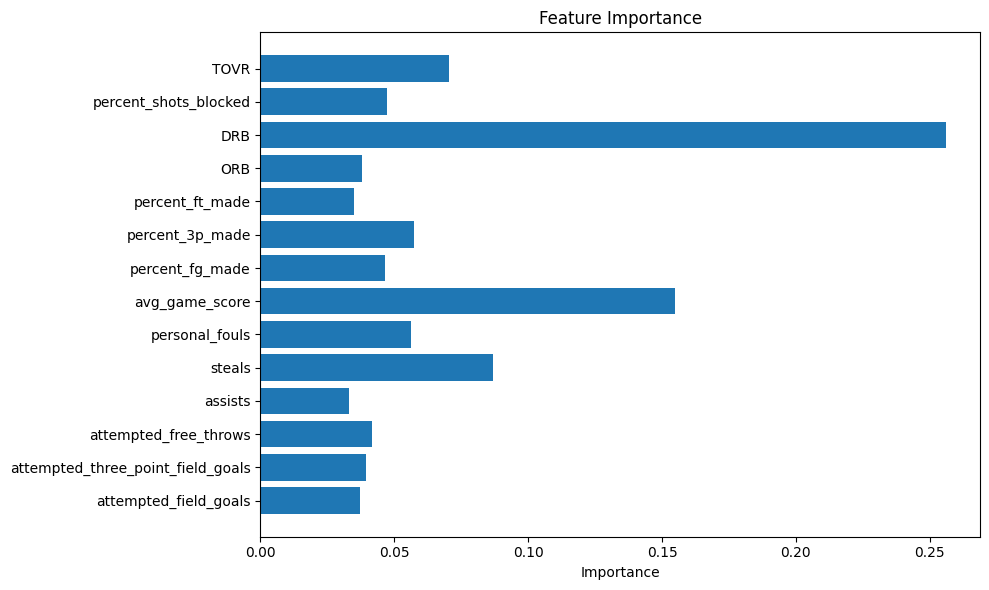

In [ ]:
# First iteration (No hyper-param tuning)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Preview data
import pandas as pd
df = pd.read_csv('cleaned_data.CSV')
df.head()

feature_cols = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]
# Inputs
X = df[feature_cols]
# Outputs
y = df['team_win']

# Train-test split; random_state ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost with limited estimators for speed
model = XGBClassifier(n_estimators=100, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance based on gain
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters:
 {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}
Accuracy: 0.8239239798770263
Confusion Matrix:
 [[791 166]
 [149 683]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       957
           1       0.80      0.82      0.81       832

    accuracy                           0.82      1789
   macro avg       0.82      0.82      0.82      1789
weighted avg       0.82      0.82      0.82      1789



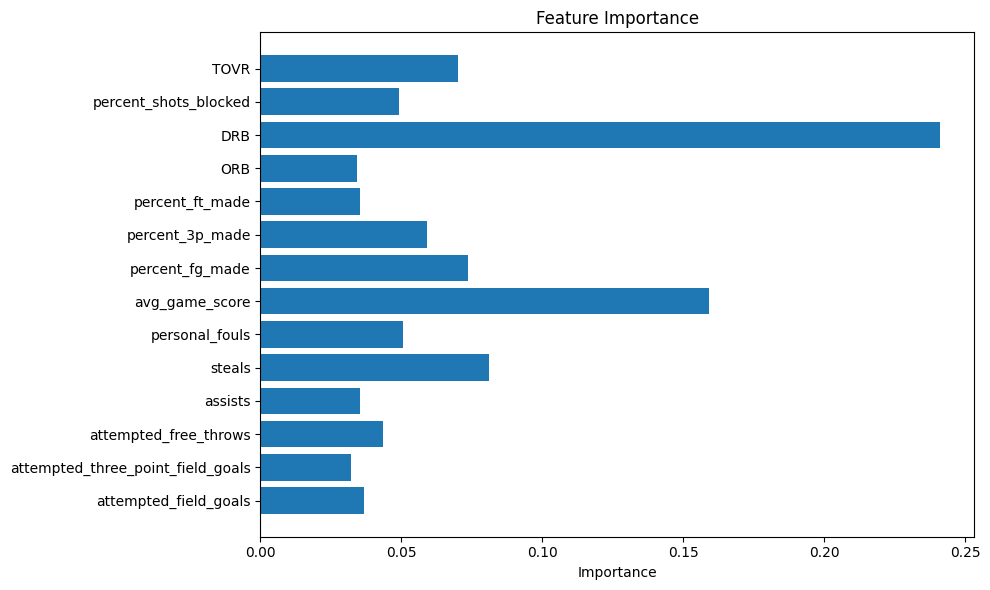

In [ ]:
# Hyperparameter tuning with RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 4, 6, 8, 12, 16],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1.0],
    'reg_alpha': [0, 0.5, 1, 2],
    'reg_lambda': [0.1, 0.5, 1, 3]
}

model = XGBClassifier(eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter combos to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:\n", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot feature importances
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 13.1 MB/s eta 0:00:00


[I 2025-03-24 22:50:00,651] A new study created in memory with name: no-name-94620e84-ec24-4a7a-a3b5-906b569c9366


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:50:42,005] Trial 0 finished with value: 0.8304909315521535 and parameters: {'n_estimators': 1314, 'learning_rate': 0.0029331750782508586, 'max_depth': 10, 'subsample': 0.9239287665411801, 'colsample_bytree': 0.5316253086132823, 'gamma': 0.016630572491962838, 'reg_alpha': 0.06736783125809788, 'reg_lambda': 0.013733836234024062}. Best is trial 0 with value: 0.8304909315521535.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:50:49,375] Trial 1 finished with value: 0.8307701634798379 and parameters: {'n_estimators': 769, 'learning_rate': 0.0778935668973576, 'max_depth': 8, 'subsample': 0.8940592628341761, 'colsample_bytree': 0.9437982795851285, 'gamma': 0.031829625943491126, 'reg_alpha': 0.0198683901113322, 'reg_lambda': 0.3937936328008604}. Best is trial 1 with value: 0.8307701634798379.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:50:50,614] Trial 2 finished with value: 0.8137227233401457 and parameters: {'n_estimators': 309, 'learning_rate': 0.006758716933681233, 'max_depth': 4, 'subsample': 0.7575574553938744, 'colsample_bytree': 0.7650697803620978, 'gamma': 0.01425572869121089, 'reg_alpha': 0.02476796937936431, 'reg_lambda': 0.5027417933048157}. Best is trial 1 with value: 0.8307701634798379.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:50:56,428] Trial 3 finished with value: 0.8293721294085051 and parameters: {'n_estimators': 651, 'learning_rate': 0.10696819249168024, 'max_depth': 10, 'subsample': 0.7698771526327968, 'colsample_bytree': 0.6179255346774342, 'gamma': 0.02359152692716564, 'reg_alpha': 0.11064949599092634, 'reg_lambda': 0.012158652987041788}. Best is trial 1 with value: 0.8307701634798379.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:51:09,990] Trial 4 finished with value: 0.8278356216058853 and parameters: {'n_estimators': 538, 'learning_rate': 0.005045988324356596, 'max_depth': 14, 'subsample': 0.6132684776058297, 'colsample_bytree': 0.5069664581001327, 'gamma': 0.44149547711858356, 'reg_alpha': 0.03561277092683675, 'reg_lambda': 0.4360556473303173}. Best is trial 1 with value: 0.8307701634798379.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:51:22,473] Trial 5 finished with value: 0.8337045882017335 and parameters: {'n_estimators': 1180, 'learning_rate': 0.021363662902641446, 'max_depth': 12, 'subsample': 0.7780469398689207, 'colsample_bytree': 0.890916231252669, 'gamma': 0.2309750166182963, 'reg_alpha': 0.017269233831604554, 'reg_lambda': 0.04312689878695978}. Best is trial 5 with value: 0.8337045882017335.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:51:27,221] Trial 6 finished with value: 0.8314697369877746 and parameters: {'n_estimators': 1139, 'learning_rate': 0.09922734435751006, 'max_depth': 8, 'subsample': 0.5366505004229724, 'colsample_bytree': 0.9615855324641766, 'gamma': 0.15916152690959146, 'reg_alpha': 0.27707215547345754, 'reg_lambda': 0.03976036887570925}. Best is trial 5 with value: 0.8337045882017335.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:51:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:52:16,243] Trial 7 finished with value: 0.8309096915796372 and parameters: {'n_estimators': 1557, 'learning_rate': 0.0030695062879396912, 'max_depth': 10, 'subsample': 0.9002450857800233, 'colsample_bytree': 0.6423731713898881, 'gamma': 0.025292115656276964, 'reg_alpha': 0.34038853480096637, 'reg_lambda': 0.01971269648561405}. Best is trial 5 with value: 0.8337045882017335.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:52:23,809] Trial 8 finished with value: 0.8352413888844957 and parameters: {'n_estimators': 1182, 'learning_rate': 0.02849922507347476, 'max_depth': 14, 'subsample': 0.8235498957248175, 'colsample_bytree': 0.7748141402614428, 'gamma': 0.7934317810074345, 'reg_alpha': 0.0964362341563235, 'reg_lambda': 0.025702739579379325}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:53:01,643] Trial 9 finished with value: 0.8324469022945987 and parameters: {'n_estimators': 1577, 'learning_rate': 0.002864429537040942, 'max_depth': 12, 'subsample': 0.6771369670203897, 'colsample_bytree': 0.7580049300958915, 'gamma': 0.28164960448238163, 'reg_alpha': 0.019536903731193905, 'reg_lambda': 2.3739529172122524}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:53:14,930] Trial 10 finished with value: 0.8316082107190618 and parameters: {'n_estimators': 1861, 'learning_rate': 0.02660279698338881, 'max_depth': 15, 'subsample': 0.9968601633221139, 'colsample_bytree': 0.8397716771459675, 'gamma': 0.679207767220296, 'reg_alpha': 1.920754083022356, 'reg_lambda': 0.12115187011956151}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:53:25,184] Trial 11 finished with value: 0.831328920215349 and parameters: {'n_estimators': 989, 'learning_rate': 0.023403379331695943, 'max_depth': 13, 'subsample': 0.8155836695835701, 'colsample_bytree': 0.8571515959764169, 'gamma': 0.9470511312808789, 'reg_alpha': 0.010676394483537341, 'reg_lambda': 0.0671047388922521}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:53:49,065] Trial 12 finished with value: 0.8327268371346247 and parameters: {'n_estimators': 1330, 'learning_rate': 0.013759909360481418, 'max_depth': 16, 'subsample': 0.6834715973812904, 'colsample_bytree': 0.8607736730862208, 'gamma': 0.08360690790332137, 'reg_alpha': 0.3184786264064168, 'reg_lambda': 0.046903767850883106}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:53:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:54:26,979] Trial 13 finished with value: 0.828534316473395 and parameters: {'n_estimators': 987, 'learning_rate': 0.0010052398193007793, 'max_depth': 12, 'subsample': 0.8138036011990484, 'colsample_bytree': 0.7008464484401922, 'gamma': 0.199002705202128, 'reg_alpha': 0.06662546444816612, 'reg_lambda': 0.03204964736430655}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:54:35,097] Trial 14 finished with value: 0.8304903457918688 and parameters: {'n_estimators': 1827, 'learning_rate': 0.04299422779719197, 'max_depth': 5, 'subsample': 0.8350801854147293, 'colsample_bytree': 0.8903169217878225, 'gamma': 0.07949568052708118, 'reg_alpha': 0.8133602917419369, 'reg_lambda': 0.11234016362622416}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:54:54,502] Trial 15 finished with value: 0.8346831593332408 and parameters: {'n_estimators': 1268, 'learning_rate': 0.012476375667036023, 'max_depth': 16, 'subsample': 0.6881291990519621, 'colsample_bytree': 0.9934787911344982, 'gamma': 0.3910071583661435, 'reg_alpha': 0.14835624918282753, 'reg_lambda': 0.02376409373319167}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:54:57,729] Trial 16 finished with value: 0.8246212620439636 and parameters: {'n_estimators': 1527, 'learning_rate': 0.19018228761491776, 'max_depth': 16, 'subsample': 0.6761665816783445, 'colsample_bytree': 0.9841841390237143, 'gamma': 0.4196678990905731, 'reg_alpha': 0.1724479774957292, 'reg_lambda': 0.02191327314158416}. Best is trial 8 with value: 0.8352413888844957.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:55:11,173] Trial 17 finished with value: 0.837058768743597 and parameters: {'n_estimators': 849, 'learning_rate': 0.011032612409419478, 'max_depth': 14, 'subsample': 0.594349024655851, 'colsample_bytree': 0.7988589804099804, 'gamma': 0.9284585320968828, 'reg_alpha': 0.06382700858714331, 'reg_lambda': 0.19688422203492206}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:55:16,973] Trial 18 finished with value: 0.8342642235776715 and parameters: {'n_estimators': 883, 'learning_rate': 0.04857627910429259, 'max_depth': 6, 'subsample': 0.5032627112145607, 'colsample_bytree': 0.7926186073876762, 'gamma': 0.9032291613254032, 'reg_alpha': 0.05240735584208504, 'reg_lambda': 0.22841758072455054}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:55:19,128] Trial 19 finished with value: 0.8204304986635879 and parameters: {'n_estimators': 101, 'learning_rate': 0.007821363474959158, 'max_depth': 14, 'subsample': 0.5888416799678335, 'colsample_bytree': 0.6933089907378833, 'gamma': 0.613707853668167, 'reg_alpha': 0.10600013430741663, 'reg_lambda': 1.3338827773494815}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:55:27,464] Trial 20 finished with value: 0.8341236411093597 and parameters: {'n_estimators': 543, 'learning_rate': 0.04070989505346318, 'max_depth': 14, 'subsample': 0.6162673119687168, 'colsample_bytree': 0.6959881119163565, 'gamma': 0.12448313781034383, 'reg_alpha': 0.03914410594959598, 'reg_lambda': 0.19971679498818984}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:55:29,873] Trial 21 finished with value: 0.8293734766571598 and parameters: {'n_estimators': 1258, 'learning_rate': 0.012519385027326909, 'max_depth': 2, 'subsample': 0.7068306625452452, 'colsample_bytree': 0.8001962741872345, 'gamma': 0.4008104511946333, 'reg_alpha': 0.17108918311728694, 'reg_lambda': 0.0794055638508139}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:55:45,619] Trial 22 finished with value: 0.8339846987698448 and parameters: {'n_estimators': 831, 'learning_rate': 0.01035619125506289, 'max_depth': 16, 'subsample': 0.5772247168955842, 'colsample_bytree': 0.9128373774119561, 'gamma': 0.621754246890334, 'reg_alpha': 0.10001767295565611, 'reg_lambda': 0.023283542869907112}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:55:58,473] Trial 23 finished with value: 0.8334253562740491 and parameters: {'n_estimators': 1423, 'learning_rate': 0.02272645204254431, 'max_depth': 15, 'subsample': 0.7284692340847696, 'colsample_bytree': 0.8135389003350713, 'gamma': 0.30864586327141835, 'reg_alpha': 0.6738407285605593, 'reg_lambda': 0.010096041862173664}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:56:19,790] Trial 24 finished with value: 0.8323073156187708 and parameters: {'n_estimators': 1109, 'learning_rate': 0.005021400794933208, 'max_depth': 13, 'subsample': 0.6470519411372868, 'colsample_bytree': 0.5865744600009786, 'gamma': 0.9164908023759701, 'reg_alpha': 0.21104314174194216, 'reg_lambda': 1.0410618515838792}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:56:34,055] Trial 25 finished with value: 0.8339845816177879 and parameters: {'n_estimators': 1997, 'learning_rate': 0.016544922217747653, 'max_depth': 11, 'subsample': 0.558189122737151, 'colsample_bytree': 0.730277664703143, 'gamma': 0.532922840991583, 'reg_alpha': 0.502063579448473, 'reg_lambda': 0.29553023813478996}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:56:41,926] Trial 26 finished with value: 0.8339838787054464 and parameters: {'n_estimators': 949, 'learning_rate': 0.03894150549607398, 'max_depth': 15, 'subsample': 0.8654935151954711, 'colsample_bytree': 0.9956234441884343, 'gamma': 0.3586666051925597, 'reg_alpha': 0.07993452799928488, 'reg_lambda': 0.13288130044839538}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:56:59,245] Trial 27 finished with value: 0.8351016850566108 and parameters: {'n_estimators': 1688, 'learning_rate': 0.008815376727871997, 'max_depth': 13, 'subsample': 0.6349452069884429, 'colsample_bytree': 0.6487813390474371, 'gamma': 0.7038115998735562, 'reg_alpha': 0.041403241758463154, 'reg_lambda': 0.05661289246345539}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:56:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:57:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:57:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:57:44,667] Trial 28 finished with value: 0.830490872976125 and parameters: {'n_estimators': 1689, 'learning_rate': 0.001702464239767782, 'max_depth': 13, 'subsample': 0.6468413235816056, 'colsample_bytree': 0.6464944224943209, 'gamma': 0.7339531380895252, 'reg_alpha': 0.03816983889444649, 'reg_lambda': 0.08282318257337526}. Best is trial 17 with value: 0.837058768743597.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:57:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:57:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:57:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-03-24 22:58:02,467] Trial 29 finished with value: 0.8327263099503686 and parameters: {'n_estimators': 725, 'learning_rate': 0.008031781699582689, 'max_depth': 11, 'subsample': 0.9413654308925894, 'colsample_bytree': 0.5926629797685897, 'gamma': 0.04834181834721815, 'reg_alpha': 0.06742099678325683, 'reg_lambda': 0.05083568265291201}. Best is trial 17 with value: 0.837058768743597.
Best Hyperparameters:
 {'n_estimators': 849, 'learning_rate': 0.011032612409419478, 'max_depth': 14, 'subsample': 0.594349024655851, 'colsample_bytree': 0.7988589804099804, 'gamma': 0.9284585320968828, 'reg_alpha': 0.06382700858714331, 'reg_lambda': 0.19688422203492206}
Test Accuracy: 0.8289547233091112
Confusion Matrix:
 [[802 155]
 [151 681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       957
           1       0.81      0.82      0.82       832

    accuracy                           0.83      1789
   macro avg       

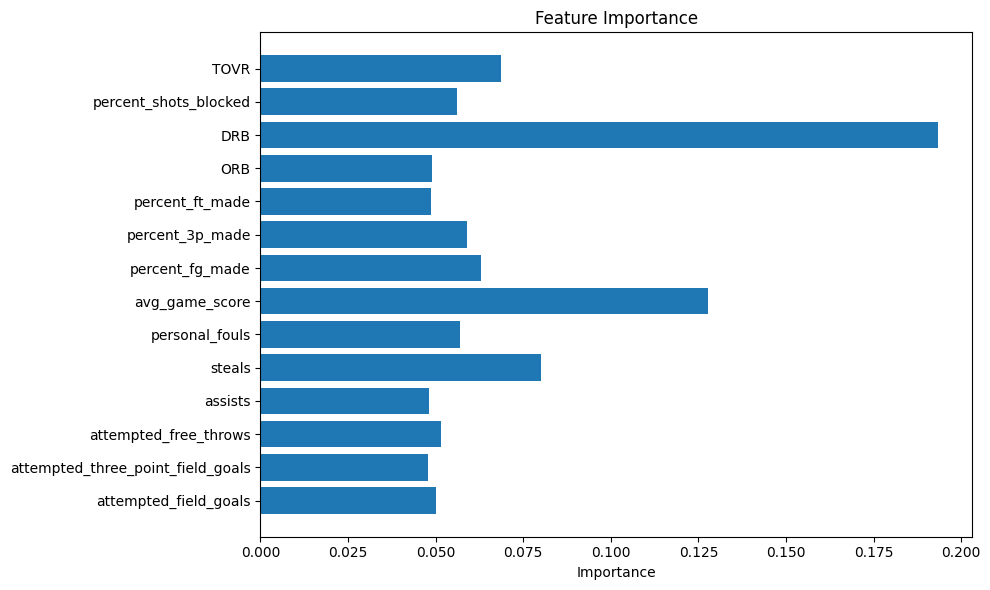

In [ ]:
# Hyperparameter tuning with Optuna

!pip install optuna
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('cleaned_data.CSV')
feature_cols = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]
X = df[feature_cols]
y = df['team_win']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Optuna objective
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 16),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 2.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 3.0, log=True),
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }

    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

# Best results
print("Best Hyperparameters:\n", study.best_params)

# Train final model with best params
best_model = XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
optuna.visualization.plot_optimization_history(study).show()
optuna.visualization.plot_param_importances(study).show()